<a href="https://colab.research.google.com/github/fg0611/data-professionalization/blob/main/data-analysis/finance_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings


In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf

In [ ]:
warnings.filterwarnings("ignore")

In [107]:
def pre_proc(name):
  df = pd.read_csv(name, delimiter="\t", parse_dates=True).dropna()
  df = df.iloc[:, :-2]
  df.columns = ["time", "open", "high", "low", "close", "volume"]
  df.set_index("time", inplace=True)
  df = df.loc["2022.01.01":]
  return df

In [108]:
df = pre_proc("EURUSD_D1.csv")
df.head()

,open,high,low,close,volume
time,,,,,
2022.01.03,1.13693,1.13778,1.12795,1.12971,53813
2022.01.04,1.12961,1.13226,1.12723,1.12862,62525
2022.01.05,1.12852,1.13466,1.12765,1.13135,61289
2022.01.06,1.13111,1.13316,1.12846,1.12976,67251
2022.01.07,1.12960,1.13647,1.12901,1.13590,49836


In [123]:
def pre_proc_yf(name):
  df = yf.download(name, start="2022-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"), progress=False).dropna()
  df.columns = ["open", "high", "low", "close", "adj close","volume"]
  del df["adj close"]
  # simple moving avg 30 days
  df["sma fast"] = df['close'].rolling(30).mean()
  # simple moving avg 60 days
  df["sma slow"] = df['close'].rolling(60).mean()
  df.index.rename("time", inplace=True)
  return df

In [124]:
df_yf = pre_proc_yf("EURUSD=X")
df_yf.head()

,open,high,low,close,volume,sma fast,sma slow
time,,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,0,NaN,NaN
2022-01-04,1.130199,1.132300,1.127345,1.130224,0,NaN,NaN
2022-01-05,1.128541,1.134559,1.127764,1.128363,0,NaN,NaN
2022-01-06,1.131222,1.133067,1.128554,1.131350,0,NaN,NaN
2022-01-07,1.129586,1.135976,1.129050,1.129688,0,NaN,NaN


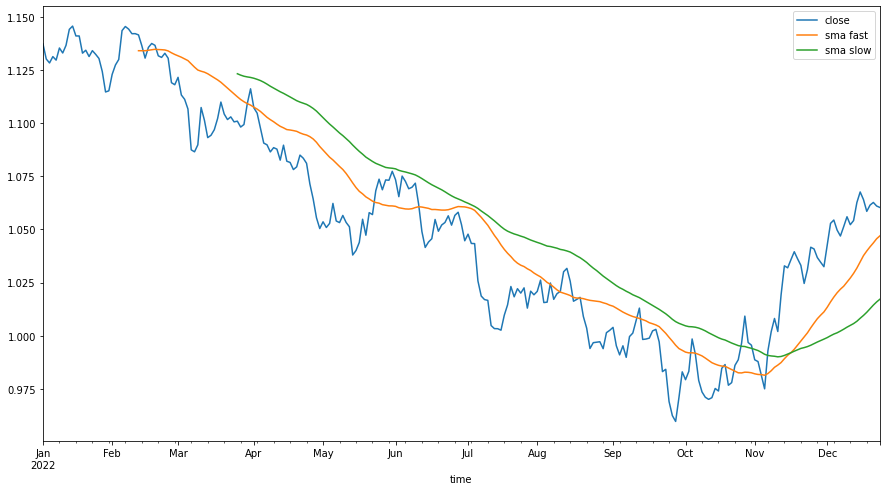

In [126]:
df_yf[["close","sma fast", "sma slow"]].plot(figsize=(15,8))